<img src="http://gi-mosm.dem.isel.pt/compdrill/img/logo_isel.png" style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

### Instituto Superior de Engenharia de Lisboa
### Licenciatura Em Informática e Multimética
# Codificação de Sinais Multimédia

## TRABALHO PRÁTICO 2

Trabalho realizado por:
* Luís Fonseca    - 45125
* João Rodrigues  - 45145
* Rodrigo Matela  - 46316

*Turma 41D*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Índice

-> [Introdução](#introducao)<br/>
-> [Exercício 1](#ex1)<br/>
-> [Exercício 2](#ex2)<br/>
-> [Exercício 4](#ex4)<br/>
-> [Exercício 5](#ex5)<br/>
-> [Exercício 3 (Ordem trocada de propósito, de modo a facilitar a sua perceção)](#ex3)<br/>
-> [Exercício 6](#ex6)<br/>
-> [Conclusão](#conclusao)<br/>
-> [Bibliografia](#bibliografia)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Introdução <a name="introducao"/>
O segundo trabalho prático da cadeira de Codificacao de Sinais e Multimedia tinha como objetivo  a exploração de conceitos de compressão de dados sem perdas baseados na teoria da informação, para isso foi utilizado os conhecimentos que foram adquiridos acerca dos conteúdos que incidiam sobre a codificação de Huffman.

Para isso, usamos este algoritmo no trabalho prático para obter uma codificação sem perdas. Foram implementados vários métodos para a sua realização que iram ser abordados mais à frente. Para testar se a nossa implementação estava correta, procedemos primeiro à codificação de strings, e de seguida, utilizamos a imagem da *`lena.tif`*, com tons de cinzento, e no final foi realizado o cálculo da entropia, número médio de bits, eficiência, e ainda determinámos qual o erro entre a imagem que passou pela codificação de Huffman, e a imagem original, para interpretação dos resultados.

Para perceber melhor como o processo deste trabalho prático irá ser realizado, foi elaborado um diagrama contendo todas as fases do trabalho:

<center><img src="https://i.imgur.com/a7XhzAs.png"></center>


**NOTA:** `A ORDEM PELA QUAL OS EXERCÍCIOS SÃO APRESENTADOS FOI TROCADA DE PROPÓSITO, DE MODO A FACILITAR A EXPLICAÇÃO E PERCEÇÃO DA REALIZAÇÃO DE EXERCÍCIOS ESPECÍFICOS (EXERCÍCIO 3). SENDO ASSIM, O EXERCÍCIO 3 ENCONTRA-SE EXPLICADO DEPOIS DO 4 E DO 5.`

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 1<a name="ex1"/>

Neste exercicio era pedido que fosse realizado o algoritmo de Huffman. Para a realização deste método, foi usado o nome *`gen_huff_table(symbol_list,symbol_prob)`*, recebendo como argumentos *symbol_list*, contento uma lista de símbolos, e o argumento *symbol_prob*, que recebe uma probabilidade de esse simbolo ocorrer, ou o número de ocorrências de cada símbolo, dado pelo seu histograma.

A codificação de Huffman é um método de compressão que utiliza as probabilidades de ocorrência dos símbolos no conjunto de dados a comprimir, de modo a determinar códigos de comprimento variável (VLC) para cada símbolo. Este algoritmo é utilizado na compressão de imagens e vídeos.

O procedimento para a realização do algoritmo foi:


* Colocar os símbolos e respetivas probabilidades/número de ocorrências numa lista;
* Ordenar a lista por ordem crescente de probabilidade;
* Escolher os dois símbolos com menor frequência/probabilidade e agrupá-los num novo símbolo com probabilidade igual à soma destes dois;
* Atribuir 0 e 1 a cada um dos símbolos, consoante o ramo onde se encontrem;
* Inserir o novo símbolo na lista ordenada;
* Voltar ao ponto 2 até que cada lista tenha apenas um símbolo;
* Atribuir códigos partindo do último símbolo criado.


Segue-se um exemplo de codificação de Huffman, com os símbolos (1, 2, 3, 4), com ocorrência (20, 10, 3, 3), respetivamente:

<center><img src="https://i.imgur.com/qxLIx5y.png" width="40%"></center>

Como se pode observar, executa-se sempre a soma dos dois símbolos com menor probabilidade, até que apenas um valor reste. Depois, atribui-se o número 1 ou 0, consoante o ramo que o símbolo siga.

<center><img src="https://i.imgur.com/3njtk5E.png" width="20%"></center>

Finalmente, seguindo a ordem inversa dos ramos, obtemos cada um dos códigos de Huffman para o exemplo meramente lúdico.

Segue abaixo o código do método executado para realizar a codificação de Huffman. De notar que a tabela retornada vem sob forma de um array bi dimensional, uma vez que no enunciado dizia: `Também pode em alternativa gerar não uma tabela mas outra estrutura de dados com os
códigos pretendidos.`.

Primeiramente, necessitamos de realizar 2 imports que vão ser utilizados na função e para os testes da mesma: *`heapq`* e *`numpy`*. Da biblioteca *`heapq`* foram importados os métodos *`heappush`*, que introduz o valor indicado no array (heap), e *`heappop`*, que retira e retorna o menor valor do array.

In [14]:
from heapq import heappush, heappop
import numpy as np

Depois, dentro da função, realizamos um zip entre os simbolos e o número de ocorrências, de modo a ficar do género: [(simb, nOcorrencias), (simb, nOcorrencias), etc]. Ordenamos esse zip com a função *sorted*, criamos um novo array em que o número de ocorrências aparecem no índice 0, eliminamos desse array todos os valores cujo número de ocorrências seja nulo, de modo a facilitar a realização da tabela, e poupar tempo de processamento, bem como espaço no pc. Procedemos com a realização da função, criando um novo array desginado `frequências`, que recebe o número de ocorrências dos símbolos que não têm ocorrências nulas.

Finalmente, criamos um while onde colocamos em prática o procedimento listado acima: obtemos os dois menores valores do array sem ocorrências nulas, retirando-os do array, atribuimos a cada um o valor *1* e *0*, somamos o valor de cada um, e colocamos a soma desses símbolos no array sem ocorrências. Voltamos a realizar este procedimento até que no array apenas exista 1 valor.

Depois, resta realizar o sort do array pelo símbolo, e retornamos o array final, e as frequências.

In [3]:
def gen_huff_table(symbol_list,symbol_prob):
    
    nOcorrencias = symbol_prob.astype(int)
    symbol_list_string = np.array(symbol_list).astype(str)
    array_zipado = zip(symbol_list_string,nOcorrencias)
    array_ordenado = sorted(array_zipado, key=lambda tup: tup[1])
    array = [[ocorrencias,[simbolo, ""]] for simbolo, ocorrencias in array_ordenado] 
    array_sem_zeros = []
    
    for i in range(len(array)):
        if array[i][0] != 0:
            array_sem_zeros.append(array[i])
            
    frequencias = []
    for i in range(len(array_sem_zeros)):
        frequencias.append(array_sem_zeros[i])
        
    array_final = []
    while len(array_sem_zeros) > 1:
        menor_ocorrencia = heappop(array_sem_zeros)
        segunda_menor_ocorrencia = heappop(array_sem_zeros)
    
        for i in menor_ocorrencia[1:]:
            i[1] = '1' + i[1]            
        for i in segunda_menor_ocorrencia[1:]:
            i[1] = '0' + i[1]
        heappush(array_sem_zeros, [menor_ocorrencia[0] + segunda_menor_ocorrencia[0]] + \
                                   menor_ocorrencia[1:] + segunda_menor_ocorrencia[1:])
        
    array_final = (array_sem_zeros[0])[slice(1, len(array_sem_zeros[0]))]
    array_final.sort(key=lambda x: int(x[0]))    

    return array_final, frequencias

Após a realização do código e da respetiva explicação, segue-se um pequeno exemplo prático:

In [4]:
simbolo = np.array([1, 2, 3, 4, 10])
ocurrencias = np.array([2, 3, 1, 2, 1])
tabela, freq = gen_huff_table(simbolo, ocurrencias)
print(tabela)

[['1', '11'], ['2', '00'], ['3', '101'], ['4', '01'], ['10', '100']]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 2<a name="ex2"/>
Para este exercício, foi pedido que fosse realizado o *`método encode_huff (message,symbol_code_table)`*. Este método permite realizar a codificação de uma mensagem que entra como atributo da função. Para isso, começamos por criar um array vazio que, no fim terá no seu interior a mensagem codificada, e que será o return da função.

De seguida colocamos a mensagem em forma de array, separando cada caracter, para ser possível, agora no passo seguinte, percorrer o array da mensagem e comparar cada caracter que é passado na mensagem com as keys que estão dentro do atributo da função symbol_code_table, o que por fim terá o output desejado, que será a mensagem codificada segundo o dicionário que obtivemos a partir do exercício 1.

Para a realização desta função, primeiramente verificamos a natureza dos elementos da mensagem, para que independentemente do valor que o utilizador coloque nos testes (string ou int), o código possa ser executado no pleno da sua forma.

De seguida convertemos a tabela obtida pelo parâmetro da função num dicionário, percorremos a lista dos símbolos da mensagem desejada, e verificamos se cada um deles se encontra nalgum símbolo da tabela. Caso isso aconteça, atribuímos a esse símbolo, a sua respetiva codificação de Huffman, e colocamos cada um dos símbolos codificados num novo array. Finalmente, caso não encontre o símbolo na tabela, informa o utilizador desse mesmo facto. Resta apenas retornar o array com a mensagem codificada, e fica assim terminada a implementação da função deste exercício 2.

Segue-se o código realizado:

In [5]:
def encode_huff(message,symbol_code_table):
    
    #Garantir que os simbolos sao lidos em formato string
    msgString = []
    if(isinstance(message[0], str)):
        msgString = message
    else:
        msgString = [str(i) for i in message]
        
        
    array_out = []
    simbolo = list(msgString)
    tabela = dict(symbol_code_table)
    for i in simbolo:
        if i in tabela:
            array_out.append(tabela[i]) 
        else:
            print("A Letra/Número " + str(i) + " não se encontra na lista de símbolos disponível")
    return array_out

Segue-se abaixo um teste realizado à função acima realizada

In [6]:
simbolo = [0, 1, 2, 3, 4]
ocurrencias = np.array([2, 3, 1, 2, 1])
tabela, frequencias = gen_huff_table(simbolo, ocurrencias)
mensagem = [1, 1, 2, 3, 2, 4]
print("Codificação da mensagem '", mensagem,"'")
codificacao = encode_huff(mensagem, tabela)
print(codificacao)

Codificação da mensagem ' [1, 1, 2, 3, 2, 4] '
['00', '00', '101', '01', '101', '100']


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 4<a name="ex4"/>

Neste exercício, era pedido para colocar todas as informações que recolhemos das alíneas anteriores, e as colocássemos num ficheiro, através do método *`writeArray2File(filename, binary_codes,symbol_code_table)`*.

Para realizar este exercício convertemos toda a informação que recolhemos em binário, para no fim, quando for preciso ler o ficheiro, ser possível reconhecer quais as informações que nele se encontram inseridas. Para tal, usamos um método que consiste em, primeiramente, inserir 8 bits, em binário, para representar o número de símbolos da tabela `symbol_code_table`, com número máximo de 255. De seguida, executamos um ciclo for, que percorre a dimensão total da tabela (`len(symbol_code_table)`), onde vamos inserir mais 8 bits, representando o número do símbolo em binário, de seguida mais 5 bits, representantes da dimensão do código de Huffman atribuído a esse símbolo, e finalmente X bits, representantes desse mesmo código de Huffman para esse símbolo em concreto.

Por exemplo, se o código binário indicativo do símbolo em binário for 11111110, quer dizer que nos encontramos no símbolo 254 do dicionário, e se o código binário indicativo da dimensão do código Huffman atribuído a esse símbolo for 00101, significa que vamos ter um código de Huffman a seguir, com dimensão 5 (00101 em inteiro).

No final de fazermos toda esta codificação da tabela de Huffman, iremos juntar à mesma a mensagem codificada, que nos é passada como argumento `binary_codes`, e iremos inserir um header no início da codificação do ficheiro indicativo de quantos zeros temos de colocar no fim, de modo a obter um array de dimensão divisível por 8 (processo designado por *`bit stuffing`*.

Após obtermos este array divisível por 8, vamos precisamente dividir o array em partes de 8 bits, converter cada uma delas em inteiro, e guardar num bytearray. Finalmente, guardamos este bytearray no ficheiro de nome indicado no parâmetro da função.

Antes de realizar o código, apenas necessitamos de realizar mais um import, da biblioteca `re`, que vai permitir realizar a reformulação do array em pedaços de 8. Segue-se então o código executado, produzido pela explicação acima dada:

In [1]:
import re

def writeArray2File(mensagem, file_name, symbol_code_table):
    
    stringmensagem = []
    if(isinstance(mensagem[0], str) ):
        stringmensagem = ''.join(mensagem)
    elif(isinstance(mensagem[0], int)):
        stringmensagem = "".join([str(a) for a in mensagem])
        
    stringTabela = ""
    primeiros8bits = format(len(symbol_code_table), '0%db'%8)
    stringTabela += primeiros8bits
    for i in range(len(symbol_code_table)):
        segundos8bits = format(int(symbol_code_table[i][0]), '0%db'%8)
        bits5indicativos = format(len(symbol_code_table[i][1]), '0%db'%5)
        huffman8bits = symbol_code_table[i][1]
        stringTabela += segundos8bits + bits5indicativos + huffman8bits
        
    tamanhoRestante = 0
    if((len(stringTabela) + len(stringmensagem) + 3) % 8 != 0):
        tamanhoRestante = 8 - ((len(stringTabela) + len(stringmensagem) + 3) % 8)
        
    header = format(tamanhoRestante, '0%db'%3) 
    zerosAdicionais = tamanhoRestante * '0'
    
    stringFinal = header+stringTabela+stringmensagem+zerosAdicionais

    binaryArray = re.findall('[01]{8}', stringFinal)
    intArray = [int(i, 2) for i in binaryArray]
    finalArray = np.array(intArray, dtype = 'uint8')
    byteArray = bytearray(finalArray)

    newFile = open(file_name, "wb")
    newFile.write(byteArray)
    newFile.close()

Segue-se um exemplo demonstrativo do código acima realizado:

In [8]:
simbolo = [0, 1, 2, 3, 4]
ocorrencias = np.array([2, 3, 1, 2, 1])
tabela, frequencias = gen_huff_table(simbolo, ocorrencias)
array = ['00', '00', '101', '01', '101', '100']
filename = "teste.txt"
writeArray2File(array, filename, tabela)
print("Ficheiro escrito com sucesso!")

Ficheiro escrito com sucesso!


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 5<a name="ex5"/>

Neste exercício foi nos pedido para ler o ficheiro criado no exercício 4, usando o método *`readFile2Array(filename)`*, que dado o nome do  ficheiro, leia uma sequência de bits (mensagem codificada) contida no ficheiro.

Para o começo do método, abrimos um ficheiro que contém a mensagem codificada dos métodos anteriores. De seguida, criamos uma variável de nome `fileread`, que guarda a informação proveniente do ficheiro. Para tal, fazemos uma operacao and bit a bit com 255, para tornar os bytes em inteiros novamente. Para ler o ficheiro, usamos o método `read()`.

De seguida criamos um array vazio de nome `array_8bits`, e iniciamos um ciclo for que percorre a dimensão do array de inteiros `fileread`, lido do ficheiro, e à medida que o for vai iterando, vamos inserindo os valores que se encontram no array `fileread`, no `array_8bits`, com formatação de 8 bits, tal como indica o nome do array. Finalmente, realizamos um "flat" ao array, ou seja, transformamos o array em string, juntando toda a informação contida no mesmo, e por fim damos return dessa string.

Segue-se abaixo o código realizado para a leitura do ficheiro:

In [9]:
def readFile2Array(file_name):

    with open(file_name, 'rb') as ficheiro:
        fileread = [byte & 255 for byte in bytearray(ficheiro.read())]
        
        
    array_8bits = []
    for i in range(len(fileread)):
        numero = format(fileread[i], '0%db'%8)
        array_8bits.append(numero)
        
    string_8bits_seguidos = ''.join(array_8bits)

    return string_8bits_seguidos

Segue-se um exemplo demonstrativo, com a leitura do ficheiro guardado no exercício anterior:

In [10]:
filename = "teste.txt"
string_lida = readFile2Array(filename)
print(string_lida)

00100000101000000000001011000000010001000000000100001110100000011000100100000100000111000000101011011000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 3<a name="ex3"/>

No exercício 3, era pedido para realizar a descodificação, ou seja, o contrário do exercício 2, usando o método *`decode_huff (binary_codes , symbol_code_table )`*, que dada uma mensagem (sequência de símbolos) codificada, e a tabela do exercício 1, retorne uma sequência de bits com a mensagem descodificada.

A explicação desde exercício vem na sequência natural dos exercícios 4 e 5, pois faz muito mais sentido executar a sua realização e explicação depois, quando já temos a mensagem codificada proveniente da leitura do ficheiro criado no exercício 4, e lido no exercício 5.

Estando a justificação do porquê de apenas agora explicarmos o exercício 3, procedemos com a sua realização.

Primeiramente, necessitamos remover os bits extra adicionados no ínicio (header) e fim (zeros adicionados para o array ficar com dimensão divisível por 8), o que foi realizado com `slice()`. De seguida, retiramos os primeiros 8 bits, convertemos para inteiros, e conseguimos compreender quantos bits existem no dicionário de Huffman. Após saber este número, realizamos um ciclo for que o percorre, em que lá dentro voltamos a pegar nos segundos 8 bits, convertendo-os para inteiro, o que indica qual o símbolo, colocando-o num array novo destinado aos símbolos de nome `simbolos`. Pegamos ainda nos próximos 5, convertemo-los para inteiro, e essa informação é indicativa da dimensão do código de Huffman que se segue, atribuído a esse símbolo. Por fim, pegamos então nesse código, e colocamo-lo num outro array destinado apenas aos códigos, de nome `huffmanCode`.

Para finalizar a primeira parte da explicação, realizamos um zip entre `simbolo` e `huffmanCode`, e assim fica reconstruída a tabela de Huffman, que vamos utilizar para realizar a descodificação.

Para iniciar a segunda parte da pergunta, invertemos a chave com o valor da tabela de Huffman, para assim ser mais fácil o termo de comparação na atribuição da descodificação. Depois, realizamos um while, em que verificamos se a chave se encontra na tabela de Huffman com ordem invertida. Caso esta se encontre na tabela, verificamos se a dimensão da key é igual ao código que estamos a comparar, e caso se confirme, adicionamos esse código num novo array destinado a receber a mensagem descodificada, de nome `array_out`, realizamos break, e o ciclo continua.

Finalmente, retornamos esse array, convertendo os números em inteiros, para melhor termo de comparação.

Segue-se o código produzido para esta pergunta:

In [11]:
def decode_huff(string_in, code_table):
    
    slicer_header = slice(0,3)
    bits_adicionados = int(string_in[slicer_header], 2)
    slicer_newString_in = slice(3, len(string_in)-bits_adicionados)
    string_withoutBitStuffing = string_in[slicer_newString_in]
    array_withoutBitStuffing = list(string_withoutBitStuffing)
    
    numeroSimbolos = int(string_withoutBitStuffing[slice(0, 8)], 2)
    del(array_withoutBitStuffing[:8])
    
    simbolos = []
    huffmanCode = []
    
    for i in range(numeroSimbolos):
        simbolo = int(''.join(array_withoutBitStuffing[:8]),2)
        simbolos.append(str(simbolo))
        del(array_withoutBitStuffing[:8])
        dimensaoHuffman = int(''.join(array_withoutBitStuffing[:5]), 2)
        del(array_withoutBitStuffing[:5])
        huffman = ''.join(array_withoutBitStuffing[:dimensaoHuffman])
        huffmanCode.append(huffman)
        del(array_withoutBitStuffing[:dimensaoHuffman])
        
    tabela = zip(simbolos, huffmanCode)

    tabela_dict = dict((i[1], i[0]) for i in tabela)
    
    mensagem = ''.join(array_withoutBitStuffing)

    index = 0
    array_out = []

    while index < len(mensagem):
        for key in tabela_dict:
            if mensagem[index : index + len(key)] == key:
                array_out.append(tabela_dict[key])
                index += len(key)
                break
            
    return np.array(array_out).astype(int)

Segue-se um exemplo demonstrativo do sucesso da execução desta função:

In [12]:
filename = "teste.txt"
string_lida = readFile2Array(filename)
simbolo = [0, 1, 2, 3, 4]
ocurrencias = np.array([2, 3, 1, 2, 1])
tabela, frequencias = gen_huff_table(simbolo, ocurrencias)
array_out = decode_huff(string_lida, tabela)
print("Mensagem descodificada:",array_out)

Mensagem descodificada: [1 1 2 3 2 4]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 6<a name="ex6"/>
Para este exercicío é pedido para fazer uma junção de todos os exercicíos realizados anteriormente. Neste caso, em vez de passarmos strings e arrays exemplificativos, iremos passar uma imagem, com o nome de *`lenac.tif`*. Foi também medido o tempo que os nossos métodos demoram a processar quando executada cada uma das funções, e também foi feito o cálculo da entropia, do número médio de bits e da eficiência, bem como foi verificado o tamanho dos ficheiros quando é lida e guardada a informação dentro deste ficheiro.

Para a resolução deste exercício, foi necessário importar algumas bibliotecas, que se seguem abaixo:

In [22]:
import matplotlib.pyplot as plt
from time import time
from scipy import stats
import os
import cv2

* `Matplotlib.pyplot` -> permite visualisar gráficos e imagens
* `time` -> permite realizar a contagem do tempo, para poder contar quanto tempo cada função demora a correr
* `scipy.stats` -> permite realizar o cálculo da entropia, dada a probabilidade de ocorrência dos símbolos, através de `stats.entropy`
* `os` -> permite obter o tamanho dos ficheiros, através de `os.path.getsize`
* `cv2` -> permite obter, editar e visualizar imagens

Para os cálculos da entropia e do número médio de bits, é necessário primeiramente obter a probabilidade de cada símbolo. Para tal, foi criado o método *`probabilidadeSimbolo(frequencias)`*, que, recebendo as frequências de cada símbolo, retorna a probabilidade de esse símbolo ocorrer.

In [24]:
def probabilidadeSimbolo(frequencias):
    somaOcorrencias = sum([i[0] for i in frequencias])
    probabilidades = []
    for i in range(len(frequencias)):  
        probabilidades.append(frequencias[i][0]/somaOcorrencias) 
    return probabilidades

A entropia pode ser definida como o número médio mínimo de *bits* necessário à representação de cada símbolo de uma dada fonta em função da probabilidade de ocorrência desse símbolo na fonte, portanto a entropia é tanto maior quanto maior quanto maior a incerteza. Em termos do código de Huffman, os símbolos com maior probabilidade serão codificados com menos bits, e os símbolos com menor probabilidade serão codificados com mais bits.

A entropia pode ser dada pela seguinte fórmula:
<br>
<center>
<img src = "https://i.imgur.com/7JSZiUY.png"/>
</center>
<br>

Sendo assim, foi criado o método de nome `entropia(frequencia)`. Para descobrir o valor da entropia, recorremos ao método da biblioteca do `scipy` de nome `entropy`, que como o próprio nome indica, retorna o resultado da entropia. A realização do método pode ser vista em baixo:

In [25]:
def entropia(frequencias):
    """metodo que calcula a entropia usando a biblioteca scipy com o metodo entropy"""
    entropy = stats.entropy(probabilidadeSimbolo(frequencias),None,2.)
    return entropy

Em relação ao número médio de bits por símbolo é dado pela probabilidade de cada símbolo multiplicada pela dimensão da codificação de Huffman desse símbolo.
Este conceito pode ser dado pela seguinte fórmula:
<br>
<center>
<img src = "https://i.imgur.com/t64UTsC.png"/>
</center>
<br>

Foi então criado o método `nBits_simbolo(frequencias, tabela)` que calcula o número médio de bits, passando como argumento a frequência desse simbolo e a tabela. Como temos de achar a probabilidade de cada símbolo ocorrer, teremos de invocar o método `probabilidadeSimbolo(frequencias)` para obter a probabilidade de cada símbolo ocorrer.

In [26]:
def nBits_simbolo(frequencias, tabela):
    """"método que calcula o número de bits por símbolo"""
    probabilidades = probabilidadeSimbolo(frequencias)
    L = 0
    for i in range(len(tabela)):
        L += probabilidades[i]*len(frequencias[i][1][1])
    return L

Em relação à eficiência, usando o teorema de codificação de *Shannon*, é possível codificar uma fonte, sem perdas, com um número médio de bits por símbolo maior ou igual à entropia da fonte.
Este teorema pode ser visto na figura em baixo:
<br>
<center>
<img src = "https://i.imgur.com/tG16Zfl.png"/>
</center>
<br>

E com isto, foi feita a realização de um método para achar a eficiência, o nome desse método é `eficiencia(entropia, nMedioBits)`, que consiste na divisão entre a entropia e o número médio de bis

In [27]:
def eficiencia(entropia, nMedioBits):
    return float(entropia) / float(nMedioBits)

Com os métodos auxiliares criados para este exercício, foi feita a realização do mesmo, com a junção de todos os métodos realizados. Segue-se em baixo o código realizado:

----------- Alínea a) ------------
Codificação Huffman:
[['25', '100101011001101001'], ['26', '100101011001100'], ['27', '00001101110100'], ['28', '1001010110010'], ['29', '100101011000'], ['30', '000011011100'], ['31', '10010101000'], ['32', '00001101100'], ['33', '1001010111'], ['34', '0010010111'], ['35', '110100011'], ['36', '011111100'], ['37', '010001100'], ['38', '11101001'], ['39', '10100101'], ['40', '01011110'], ['41', '00011010'], ['42', '00000001'], ['43', '1101011'], ['44', '1100001'], ['45', '1010100'], ['46', '0111101'], ['47', '0110110'], ['48', '1000000'], ['49', '0110101'], ['50', '0111010'], ['51', '0111011'], ['52', '1000010'], ['53', '1010011'], ['54', '1100011'], ['55', '1101001'], ['56', '1110110'], ['57', '1111100'], ['58', '00011001'], ['59', '00011100'], ['60', '00110100'], ['61', '01110011'], ['62', '10000111'], ['63', '10010011'], ['64', '10110001'], ['65', '11001011'], ['66', '11101000'], ['67', '11100100'], ['68', '11110001'], ['69', '11110000'], ['70', '1

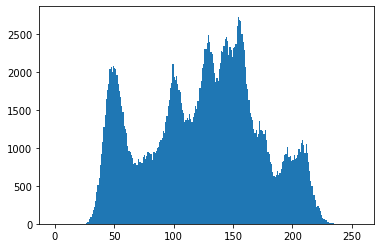

In [30]:
# Lê a imagem em níveis de cinzento
x = cv2.imread( "lenac.tif", cv2.IMREAD_GRAYSCALE )
shape = x.shape

# Converte a imagem (matriz) numa sequência de números (array)
xi = x.ravel()

# Calcula o histogram
symbol_ocorr, symbols_list, patches = plt.hist(xi,256,[0,256])
symbol_list = np.arange(0, 256)

# código alínea a) - Gera o código de Huffman
t0 = time()
symbol_code_table, frequencias = gen_huff_table(symbol_list, symbol_ocorr)
t1 = time()
print("----------- Alínea a) ------------")
print("Codificação Huffman:")
print(symbol_code_table)
print()
print("time a) tabela Huffman: ", t1-t0)
print()

def probabilidadeSimbolo(frequencias):
    
    somaOcorrencias = sum([i[0] for i in frequencias])
    
    probabilidades = []
    for i in range(len(frequencias)):
        
        probabilidades.append(frequencias[i][0]/somaOcorrencias)
        
    return probabilidades

def entropia(frequencias):
    """metodo que calcula a entropia usando a biblioteca scipy com o metodo entropy"""

    entropy = stats.entropy(probabilidadeSimbolo(frequencias),None,2.)
    return entropy


def nBits_simbolo(frequencias, tabela):
    
    probabilidades = probabilidadeSimbolo(frequencias)

    L = 0
    for i in range(len(tabela)):
        L += probabilidades[i]*len(frequencias[i][1][1])
    
    return L
    

def eficiencia(entropia, nMedioBits):
    return float(entropia) / float(nMedioBits)


# código alíneas b)

Entropy = entropia(frequencias)
print("Entropia: ", Entropy)
L = nBits_simbolo(frequencias, symbol_code_table)
print("Número médio de bits por símbolo: ", L)
Eficiency = eficiencia(Entropy, L)
print("Eficiência: ", Eficiency)
print()


# código alíneas c) e d) - Codifica e grava ficheiro
binary_codes = encode_huff(xi, symbol_code_table)
t2 = time()
print("A mensagem foi codificada com sucesso, ficando com tamanho: ", len(binary_codes))
print("time c) codificação:", t2-t1)

filename = "LenaCodificada.txt"
writeArray2File(binary_codes, filename, symbol_code_table)
print()
print("Escreveu no ficheiro com sucesso")
print("Ficheiro de tamanho:", os.path.getsize(filename), "bytes")


# código alíneas e) e f) Lê ficheiro e descodifica
binaryArray = readFile2Array(filename)
print()
print("Ficheiro lido com sucesso")

yi = decode_huff(binaryArray, symbol_code_table)
t3 = time()
print("time descodificacao:", t3-t2)

img = np.array(yi).reshape(shape)
cv2.imwrite("lenaDepoisDescodificacao.tif",img)

# código alíneas g)
erro = np.sum(xi - yi)
print("Erro:",erro)
size_ini = os.path.getsize("lenaGray.tif")
size_end = os.path.getsize(filename)
print("taxa: ", 1.* size_ini / size_end)
#plt.show()
#cv2.waitKey(0)
#plt.close("all")
#cv2.destroyAllWindows()

Como se pode observar nos diferentes prints que foram feitos, é de reparar que o tempo de processamento é relativamente baixo. É de notar que cada tempo varia a cada execução do código, sendo que o mais variante é o tempo de descodificação (varia entre 8 e 12 segundos usualmente). Segue-se as tabelas dos valores obtidos para as variáveis e para os tempos:

<center><img src = "https://i.imgur.com/KE6ZL6n.png" width="350" height="350"></center>

<center><img src = "https://i.imgur.com/Zi9Ivnu.png" width="500" height="500"></center>

O valor da entropia e do número médio de bits por símbolo deve ser relativamente igual/parecido. Observando os valores obtidos, podemos deduzir que isto se confirma. Como a efeciência do código é a divisão entre estes dois valores, e ambos são praticamente idênticos, é esperado uma efeciência de código com valor aproximado de 1, que vai de acordo com o resultado obtido.

No final do exercício era pedido que fosse feita uma comparação entre o tamanho dos diferentes ficheiros, e verificar se existe alguma alteração ou perda de informação.

Utilizando a biblioteca `path` e o método `getsize()` dessa mesma biblioteca, conseguimos obter os tamanhos das imagens originais e descodificadas, respetivamente. Através dos resultados obtidos podemos calcular a Taxa de Compressão utilizando a expressão descrita em cima.

Como seria de esperar, visto que a codificação de Huffman se trata de uma codificação sem perdas, o tamanho da imagem original e da imagem codificada tinha que ser idêntico, e através do teste e dos cálculos efetuados, conseguimos provar esse objetivo com sucesso.

De seguida, apresentamos as imagens antes e depois, de terem sido codificadas e descodificadas:
<br>
<center>
<img src = "https://i.imgur.com/XccpYKK.png%22/" style="float:left" width="350" height="350">
</center>
<center>
<img src = "https://i.imgur.com/TXRY461.png%22/" style="float:right" width="350" height="350">
</center>
<br>

Nas imagens de cima apresentadas, à esquerda, podemos visualizar a imagem original da lena em tons de cinzento, e na direita, a mesma foto, mas quando esta é submetida à codificação de Huffman.

Como podemos observar nestas duas imagens, ambas estão iguais, não surgindo perda de informação em ambas, pelo que o funcionamento deste algoritmo, assim como todos os outros métodos para a realização desta etapa estão corretos.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Conclusão<a name="conclusao"/>

Com a realização deste trabalho pratico adquirimos vários conhecimentos tais como
compressão sem perdas(Lossless), codificação de Huffman, entropia, entre muitos outros. Estes conhecimentos adquiridos permitem-nos realizar uma
descompressão sem perdas, o que é uma mais valia. Durante a realização do trabalho deparámos-nos com algumas dificuldades na escrita do ficheiro
mas com algum pensamento critico e perseverança conseguimos ultrapassar as dificuldades e conseguir na nossa opinião uma boa estruturação de código
com uma boa eficiência.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Bibliografia<a name="bibliografia"/>
-> Slides fornecidos pelos docentes<br>
-> Codificação de huffman:https://pt.wikipedia.org/wiki/Codifica%C3%A7%C3%A3o_de_Huffman